In [5]:
import networkx as nx
import numpy as np

def initialize_ba_network(m0):
    # Initialize a network with m0 nodes and fully connected
    G = nx.complete_graph(m0)
    return G


In [6]:
def barabasi_albert_algorithm(G, m, num_nodes):
    # Add nodes incrementally with preferential attachment
    for i in range(len(G.nodes()), num_nodes):
        # Calculate probabilities for connecting to existing nodes based on their degree
        node_probs = np.array([deg / sum(dict(G.degree()).values()) for _, deg in G.degree()])
        # Select m nodes to connect to based on preferential attachment
        selected_nodes = np.random.choice(list(G.nodes()), size=m, replace=False, p=node_probs)
        # Add new node
        G.add_node(i)
        # Connect the new node to selected nodes
        for node in selected_nodes:
            G.add_edge(i, node)
    return G


In [8]:
m0 = 5  # Initial number of nodes
m = 3   # Number of edges to attach from a new node to existing nodes

# Initialize the network
ba_network = initialize_ba_network(m0)

# Generate the scale-free network using the BA algorithm
scale_free_network = barabasi_albert_algorithm(ba_network, m, 1000)


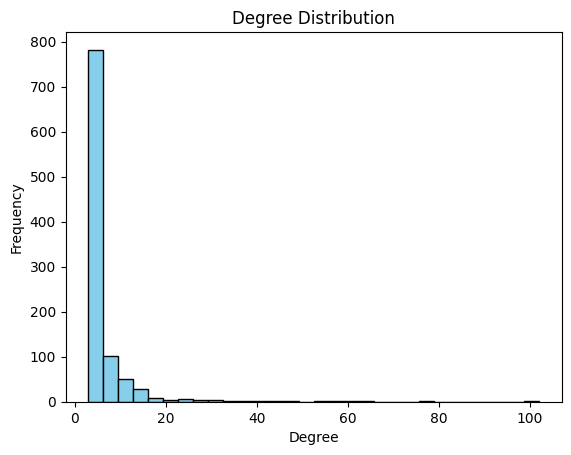

In [10]:
import matplotlib.pyplot as plt

# Degree distribution
degree_sequence = [d for n, d in scale_free_network.degree()]

# Plot degree distribution
plt.hist(degree_sequence, bins=30, color='skyblue', edgecolor='black')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

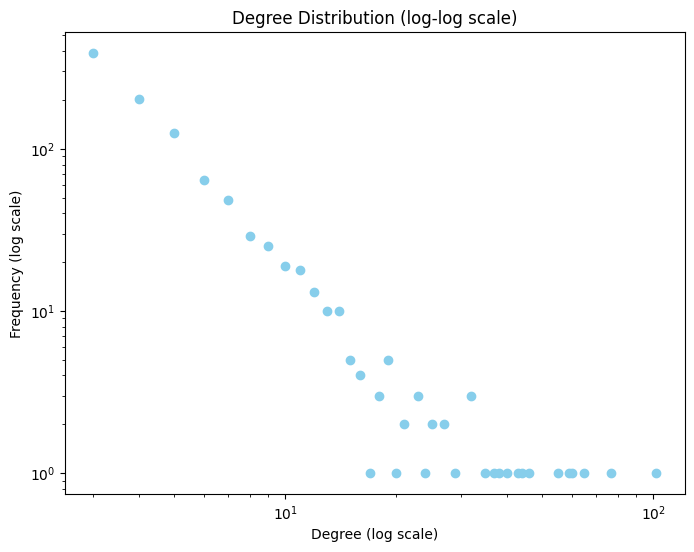

In [11]:
from collections import Counter

# Degree distribution
degree_sequence = [d for n, d in scale_free_network.degree()]

# Count the frequency of each degree
degree_counts = Counter(degree_sequence)

# Sort the degrees and their counts
sorted_degrees = sorted(degree_counts.keys())
degree_counts = [degree_counts[d] for d in sorted_degrees]

# Plot degree distribution (log-log scale)
plt.figure(figsize=(8, 6))
plt.scatter(sorted_degrees, degree_counts, color='skyblue')
plt.xscale('log')
plt.yscale('log')
plt.title("Degree Distribution (log-log scale)")
plt.xlabel("Degree (log scale)")
plt.ylabel("Frequency (log scale)")
plt.show()

In [12]:
max_degree = max(degree_sequence)

# Minimum degree
min_degree = min(degree_sequence)

# Average degree
avg_degree = sum(degree_sequence) / len(degree_sequence)

# Standard deviation of the degree distribution
std_dev_degree = np.std(degree_sequence)


In [13]:
print("Maximum Degree:", max_degree)
print("Minimum Degree:", min_degree)
print("Average Degree:", avg_degree)
print("Standard Deviation of Degree Distribution:", std_dev_degree)

Maximum Degree: 102
Minimum Degree: 3
Average Degree: 5.99
Standard Deviation of Degree Distribution: 7.045558884857893


In [22]:
degree_centrality = nx.degree_centrality(scale_free_network)
eigenvector_centrality = nx.eigenvector_centrality(scale_free_network)
pagerank_centrality = nx.pagerank(scale_free_network)
betweenness_centrality = nx.betweenness_centrality(scale_free_network)
closeness_centrality = nx.closeness_centrality(scale_free_network)
reciprocity = nx.reciprocity(scale_free_network)
transitivity = nx.transitivity(scale_free_network)
local_clustering_coefficient = nx.clustering(scale_free_network)
degree_centrality = nx.degree_centrality(scale_free_network)

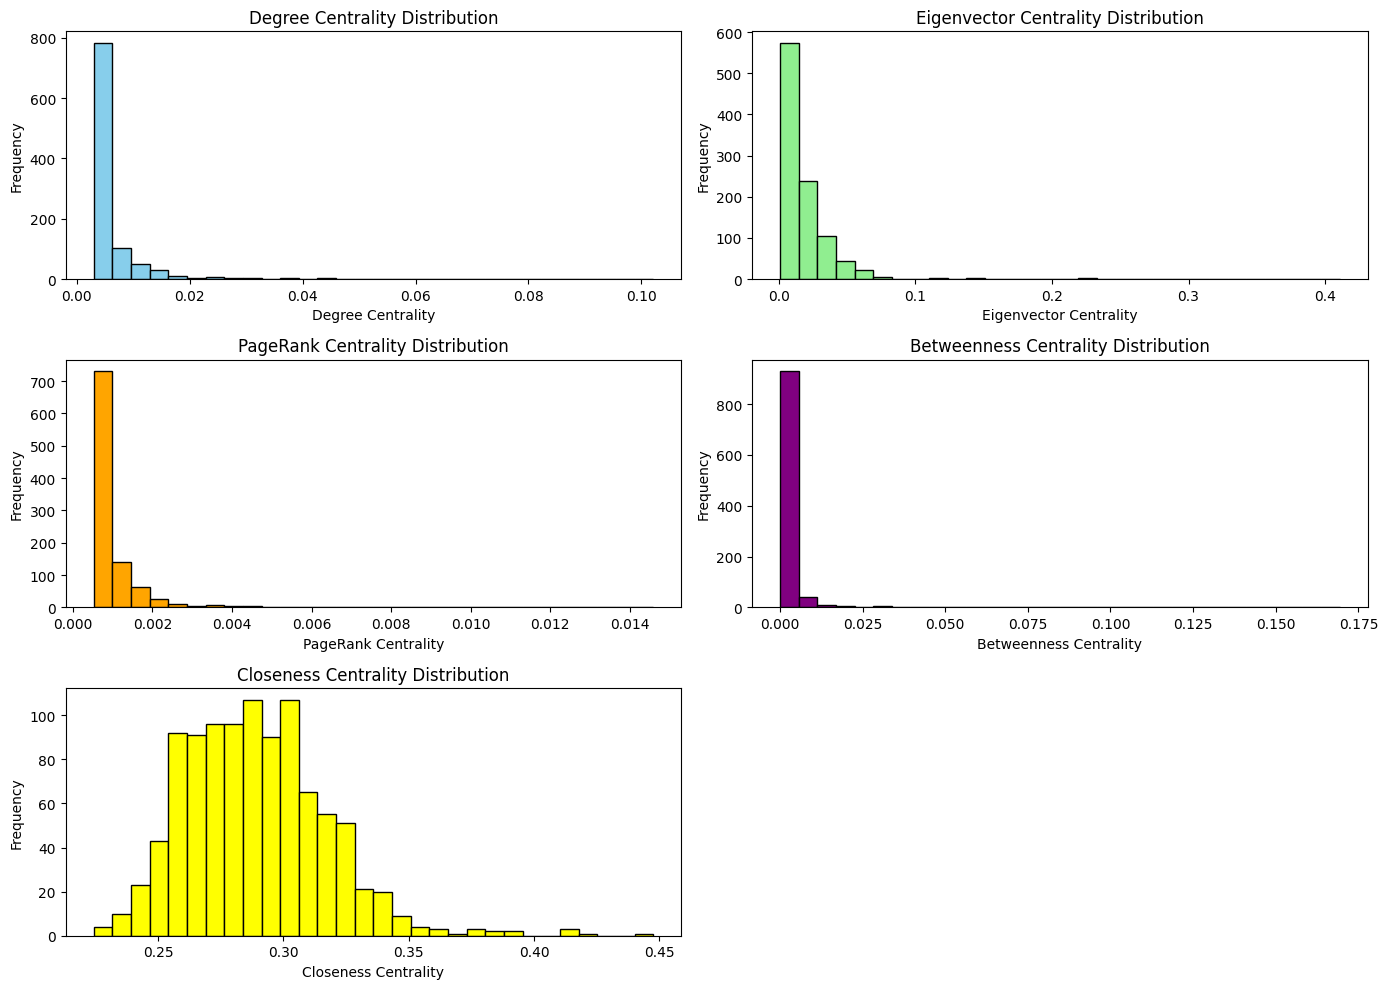

In [24]:
import matplotlib.pyplot as plt

# Degree Centrality
degree_centralities = list(nx.degree_centrality(scale_free_network).values())

# Eigenvector Centrality
eigenvector_centralities = list(nx.eigenvector_centrality(scale_free_network).values())

# PageRank Centrality
pagerank_centralities = list(nx.pagerank(scale_free_network).values())

# Betweenness Centrality
betweenness_centralities = list(nx.betweenness_centrality(scale_free_network).values())

# Closeness Centrality
closeness_centralities = list(nx.closeness_centrality(scale_free_network).values())

# Local Clustering Coefficients
local_clustering_coefficients = list(nx.clustering(scale_free_network).values())

# Global Clustering Coefficient
global_clustering_coefficient = nx.average_clustering(scale_free_network)

# Plotting
plt.figure(figsize=(14, 10))

plt.subplot(3, 2, 1)
plt.hist(degree_centralities, bins=30, color='skyblue', edgecolor='black')
plt.title("Degree Centrality Distribution")
plt.xlabel("Degree Centrality")
plt.ylabel("Frequency")

plt.subplot(3, 2, 2)
plt.hist(eigenvector_centralities, bins=30, color='lightgreen', edgecolor='black')
plt.title("Eigenvector Centrality Distribution")
plt.xlabel("Eigenvector Centrality")
plt.ylabel("Frequency")

plt.subplot(3, 2, 3)
plt.hist(pagerank_centralities, bins=30, color='orange', edgecolor='black')
plt.title("PageRank Centrality Distribution")
plt.xlabel("PageRank Centrality")
plt.ylabel("Frequency")

plt.subplot(3, 2, 4)
plt.hist(betweenness_centralities, bins=30, color='purple', edgecolor='black')
plt.title("Betweenness Centrality Distribution")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Frequency")

plt.subplot(3, 2, 5)
plt.hist(closeness_centralities, bins=30, color='yellow', edgecolor='black')
plt.title("Closeness Centrality Distribution")
plt.xlabel("Closeness Centrality")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


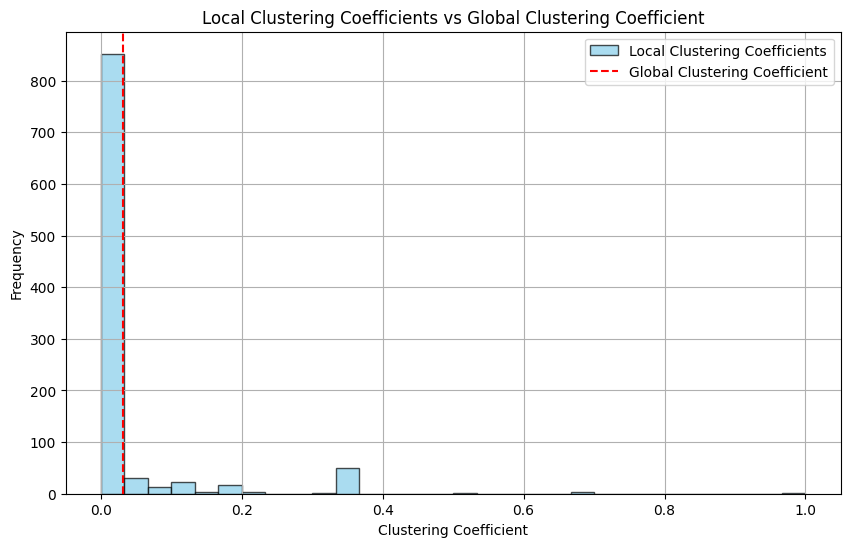

Global Clustering Coefficient: 0.03155267903143568


In [25]:
local_clustering_coefficients = list(nx.clustering(scale_free_network).values())

# Global Clustering Coefficient
global_clustering_coefficient = nx.average_clustering(scale_free_network)

# Plotting
plt.figure(figsize=(10, 6))

# Plot histogram of local clustering coefficients
plt.hist(local_clustering_coefficients, bins=30, color='skyblue', edgecolor='black', alpha=0.7, label='Local Clustering Coefficients')

# Plot global clustering coefficient as a vertical line
plt.axvline(x=global_clustering_coefficient, color='red', linestyle='--', label='Global Clustering Coefficient')

plt.title("Local Clustering Coefficients vs Global Clustering Coefficient")
plt.xlabel("Clustering Coefficient")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

# Print global clustering coefficient
print("Global Clustering Coefficient:", global_clustering_coefficient)

In [26]:
G = nx.Graph()
G2=nx.Graph()
with open("dataset.txt", "r") as file:
    for line in file:
        node1, node2 = line.strip().split()  # Assuming nodes are separated by space
        G.add_edge(node1, node2)
with open("dataset2.txt", "r") as file:
    for line in file:
        node1, node2 = line.strip().split()  # Assuming nodes are separated by space
        G2.add_edge(node1, node2)

In [35]:
giant_component = max(nx.connected_components(scale_free_network), key=len)
giant_component2 = max(nx.connected_components(G), key=len)
giant_component3 = max(nx.connected_components(G2), key=len)
# Create a subgraph containing only the giant component
giant_component_subgraph = scale_free_network.subgraph(giant_component)
giant_component_subgraph2 = G.subgraph(giant_component2)
giant_component_subgraph3 = G2.subgraph(giant_component3)


In [36]:
num_nodes_giant = giant_component_subgraph.number_of_nodes()
num_edges_giant = giant_component_subgraph.number_of_edges()
avg_degree_giant = sum(dict(giant_component_subgraph.degree()).values()) / num_nodes_giant
global_clustering_coefficient_giant = nx.average_clustering(giant_component_subgraph)

num_nodes_giant2 = giant_component_subgraph2.number_of_nodes()
num_edges_giant2 = giant_component_subgraph2.number_of_edges()
avg_degree_giant2 = sum(dict(giant_component_subgraph2.degree()).values()) / num_nodes_giant2
global_clustering_coefficient_giant2 = nx.average_clustering(giant_component_subgraph2)

num_nodes_giant3 = giant_component_subgraph3.number_of_nodes()
num_edges_giant3 = giant_component_subgraph3.number_of_edges()
avg_degree_giant3 = sum(dict(giant_component_subgraph3.degree()).values()) / num_nodes_giant3
global_clustering_coefficient_giant3 = nx.average_clustering(giant_component_subgraph3)

In [37]:

print("\nBasic Statistics for Giant Component of BA network:")
print("Number of Nodes (Giant Component):", num_nodes_giant)
print("Number of Edges (Giant Component):", num_edges_giant)
print("Average Degree (Giant Component):", avg_degree_giant)
print("Global Clustering Coefficient (Giant Component):", global_clustering_coefficient_giant)


print("\nBasic Statistics for Giant Component of 2nd network:")
print("Number of Nodes (Giant Component):", num_nodes_giant2)
print("Number of Edges (Giant Component):", num_edges_giant2)
print("Average Degree (Giant Component):", avg_degree_giant2)
print("Global Clustering Coefficient (Giant Component):", global_clustering_coefficient_giant2)


print("\nBasic Statistics for Giant Component of 3rd network:")
print("Number of Nodes (Giant Component):", num_nodes_giant3)
print("Number of Edges (Giant Component):", num_edges_giant3)
print("Average Degree (Giant Component):", avg_degree_giant3)
print("Global Clustering Coefficient (Giant Component):", global_clustering_coefficient_giant3)


Basic Statistics for Giant Component of BA network:
Number of Nodes (Giant Component): 1000
Number of Edges (Giant Component): 2995
Average Degree (Giant Component): 5.99
Global Clustering Coefficient (Giant Component): 0.03155267903143568

Basic Statistics for Giant Component of 2nd network:
Number of Nodes (Giant Component): 4941
Number of Edges (Giant Component): 6594
Average Degree (Giant Component): 2.66909532483303
Global Clustering Coefficient (Giant Component): 0.08010361108159712

Basic Statistics for Giant Component of 3rd network:
Number of Nodes (Giant Component): 1039
Number of Edges (Giant Component): 1305
Average Degree (Giant Component): 2.512030798845043
Global Clustering Coefficient (Giant Component): 0.018905541042210917


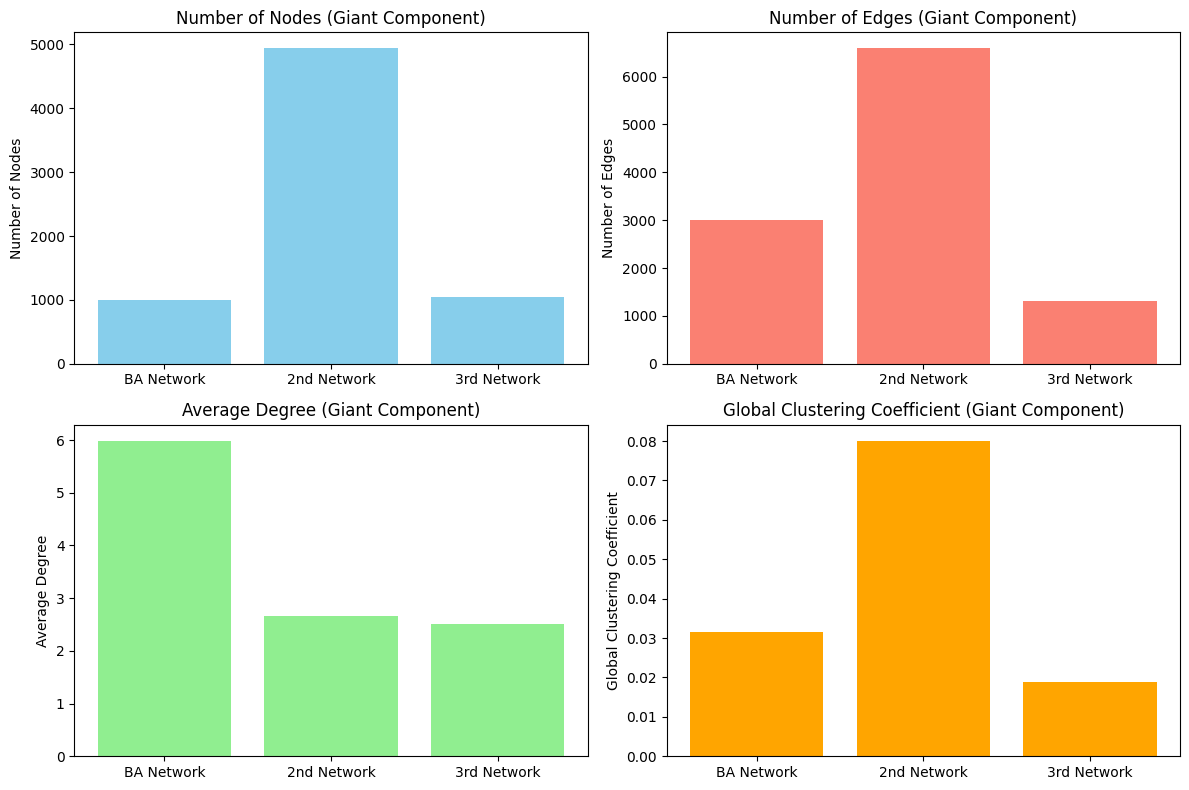

In [38]:
# Basic statistics for each network's giant component
networks = ['BA Network', '2nd Network', '3rd Network']
num_nodes_giants = [num_nodes_giant, num_nodes_giant2, num_nodes_giant3]
num_edges_giants = [num_edges_giant, num_edges_giant2, num_edges_giant3]
avg_degrees_giants = [avg_degree_giant, avg_degree_giant2, avg_degree_giant3]
global_clustering_coefficients_giants = [global_clustering_coefficient_giant, global_clustering_coefficient_giant2, global_clustering_coefficient_giant3]

# Plotting
plt.figure(figsize=(12, 8))

# Number of Nodes
plt.subplot(2, 2, 1)
plt.bar(networks, num_nodes_giants, color='skyblue')
plt.title('Number of Nodes (Giant Component)')
plt.ylabel('Number of Nodes')

# Number of Edges
plt.subplot(2, 2, 2)
plt.bar(networks, num_edges_giants, color='salmon')
plt.title('Number of Edges (Giant Component)')
plt.ylabel('Number of Edges')

# Average Degree
plt.subplot(2, 2, 3)
plt.bar(networks, avg_degrees_giants, color='lightgreen')
plt.title('Average Degree (Giant Component)')
plt.ylabel('Average Degree')

# Global Clustering Coefficient
plt.subplot(2, 2, 4)
plt.bar(networks, global_clustering_coefficients_giants, color='orange')
plt.title('Global Clustering Coefficient (Giant Component)')
plt.ylabel('Global Clustering Coefficient')

plt.tight_layout()
plt.show()

In [42]:
def icm_simulation(G):
    max_nodes = 0
    steps = 0

    # Initialize active nodes (initial seed)
    active_nodes = set(np.random.choice(list(G.nodes()), size=1))

    # Continue until no more nodes can be activated
    while True:
        steps += 1
        # Nodes activated in this step
        newly_activated = set()
        # Iterate over active nodes
        for node in list(active_nodes):
            # Iterate over neighbors of the active node
            for neighbor in G.neighbors(node):
                # If the neighbor is not already active
                if neighbor not in active_nodes:
                    newly_activated.add(neighbor)
        # Add newly activated nodes to the set of active nodes
        active_nodes |= newly_activated
        # Update the maximum number of nodes reached
        if len(active_nodes) > max_nodes:
            max_nodes = len(active_nodes)
        # If no more nodes can be activated, stop the simulation
        if len(newly_activated) == 0:
            break

    return steps, max_nodes

In [44]:
steps1, max_nodes1 = icm_simulation(scale_free_network)
steps2, max_nodes2 = icm_simulation(G)
steps3, max_nodes3 = icm_simulation(G2)

# Display results
print("Number of steps required and maximum number of nodes reached for each network:")
print("1. Scale-free network: Steps =", steps1, ", Max Nodes =", max_nodes1)
print("2. Second network: Steps =", steps2, ", Max Nodes =", max_nodes2)
print("3. Third network: Steps =", steps3, ", Max Nodes =", max_nodes3)

Number of steps required and maximum number of nodes reached for each network:
1. Scale-free network: Steps = 6 , Max Nodes = 1000
2. Second network: Steps = 43 , Max Nodes = 4941
3. Third network: Steps = 51 , Max Nodes = 1039


In [45]:
def icm_simulation_average(G, num_iterations):
    total_steps = 0

    for _ in range(num_iterations):
        steps, _ = icm_simulation(G)
        total_steps += steps

    average_steps = total_steps / num_iterations

    return average_steps


In [60]:
num_iterations = 10

# Perform multiple iterations of ICM simulation and calculate the average number of steps for each network
average_steps1 = icm_simulation_average(scale_free_network, num_iterations)
average_steps2 = icm_simulation_average(G, num_iterations)
average_steps3 = icm_simulation_average(G2, num_iterations)

# Display the average number of steps required for each network
print("Average number of steps required for each network:")
print("1. Scale-free network:", average_steps1)
print("2. Second network:", average_steps2)
print("3. Third network:", average_steps3)

Average number of steps required for each network:
1. Scale-free network: 6.0
2. Second network: 35.0
3. Third network: 47.1


In [54]:
def assign_random_probabilities(G):
    for node in G.nodes():
        outgoing_edges = list(G.edges(node))
        # Generate random probabilities for outgoing edges
        probabilities = np.random.uniform(0, 1, len(outgoing_edges))
        # Normalize probabilities so that they sum up to 1
        probabilities /= np.sum(probabilities)
        # Assign probabilities to edges
        for i, (source, target) in enumerate(outgoing_edges):
            G[source][target]['p'] = probabilities[i]


In [55]:
def icm_simulation2(G):
    max_nodes = 0
    steps = 0

    # Initialize active nodes (initial seed)
    active_nodes = set(np.random.choice(list(G.nodes()), size=1))

    # Continue until no more nodes can be activated
    while True:
        steps += 1
        # Nodes activated in this step
        newly_activated = set()
        # Iterate over active nodes
        for node in list(active_nodes):
            # Iterate over neighbors of the active node
            for neighbor in G.neighbors(node):
                # If the neighbor is not already active and it gets activated with probability p
                if neighbor not in active_nodes and np.random.random() < G[node][neighbor]['p']:
                    newly_activated.add(neighbor)
        # Add newly activated nodes to the set of active nodes
        active_nodes |= newly_activated
        # Update the maximum number of nodes reached
        if len(active_nodes) > max_nodes:
            max_nodes = len(active_nodes)
        # If no more nodes can be activated, stop the simulation
        if len(newly_activated) == 0:
            break

    return steps, max_nodes


In [56]:
def icm_simulation_average2(G, num_iterations):
    total_steps = 0

    for _ in range(num_iterations):
        steps, _ = icm_simulation2(G)
        total_steps += steps

    average_steps = total_steps / num_iterations

    return average_steps


In [61]:

# Assign random activation probabilities to edges in each network
assign_random_probabilities(scale_free_network)
assign_random_probabilities(G)
assign_random_probabilities(G2)

# Perform multiple iterations of ICM simulation with random probabilities
average_steps1 = icm_simulation_average2(scale_free_network, num_iterations)
average_steps2 = icm_simulation_average2(G, num_iterations)
average_steps3 = icm_simulation_average2(G2, num_iterations)

# Display the average number of steps required for each network
print("Average number of steps required for each network with random activation probabilities:")
print("1. Scale-free network:", average_steps1)
print("2. Second network:", average_steps2)
print("3. Third network:", average_steps3)

Average number of steps required for each network with random activation probabilities:
1. Scale-free network: 12.9
2. Second network: 34.4
3. Third network: 41.9
